4. Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, size of images, are sizes standardized? do they need to be cropped? normalized? etc.

5. Plot your data. For tabular data, you will need to run scatters, for image data, you will need to plot your example classes.

6. How will you preprocess your data? You should explain this in your Readme.MD file and link your jupyter notebook to it. Your jupyter notebook should be uploaded to your repo.

7. Jupyter Notebook data download and environment setup requirements: 

    !wget !unzip like functions as well as !pip install functions for non standard libraries not available in colab are required to be in the top section of your jupyter lab notebook. Please see HW2 & HW3 for examples.

Note: You will still be able to of course edit your GitHub repo for the data exploration part for your final submission, but I will grade this part of your submission as if it were finalized! You are expected to finalize the data exploration by Sunday.

Any git commits past the deadline will not be considered!

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro 

#initialize data set
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.info()
diabetes_df.describe()
diabetes_df.head()


# print(sum(diabetes_df["Age"])/len(diabetes_df["Age"]))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


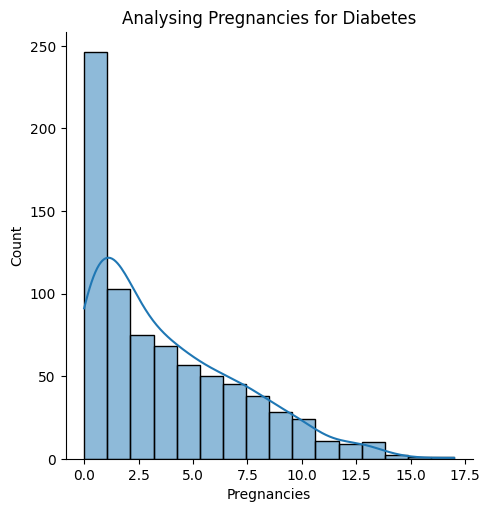

Shapiro-Wilk test: ShapiroResult(statistic=0.9042831659317017, pvalue=1.6100101271064348e-21)


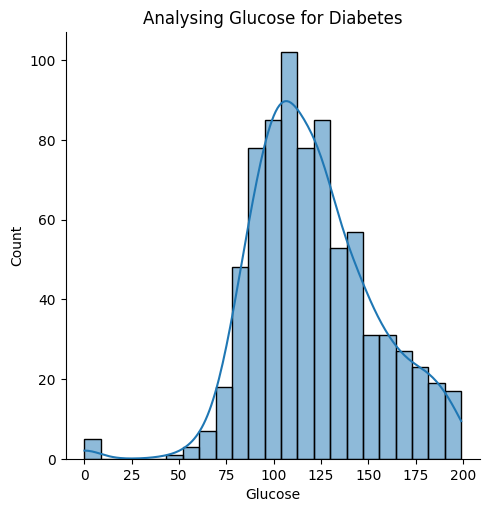

Shapiro-Wilk test: ShapiroResult(statistic=0.9701048731803894, pvalue=1.987464880170986e-11)


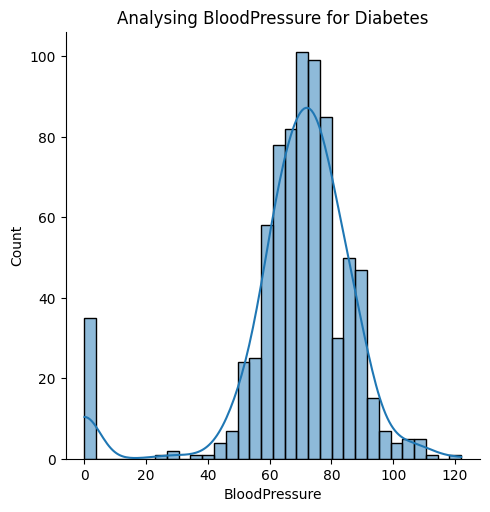

Shapiro-Wilk test: ShapiroResult(statistic=0.81892329454422, pvalue=1.5844936208677322e-28)


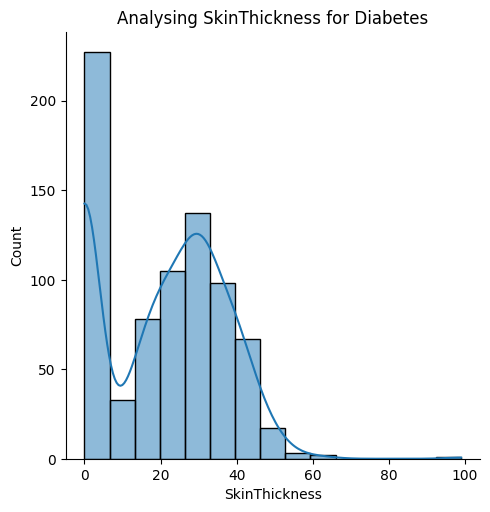

Shapiro-Wilk test: ShapiroResult(statistic=0.904627799987793, pvalue=1.751799708531821e-21)


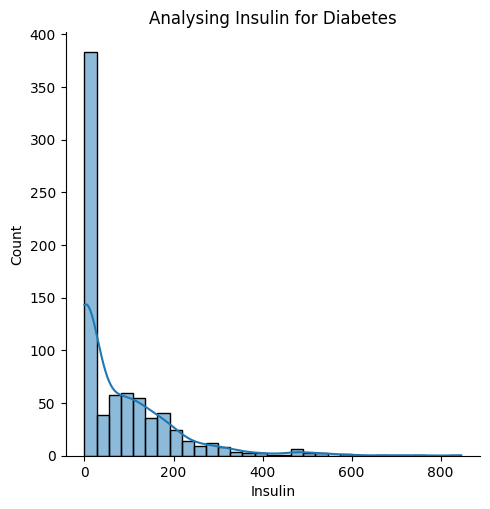

Shapiro-Wilk test: ShapiroResult(statistic=0.7220208644866943, pvalue=7.915339984765649e-34)


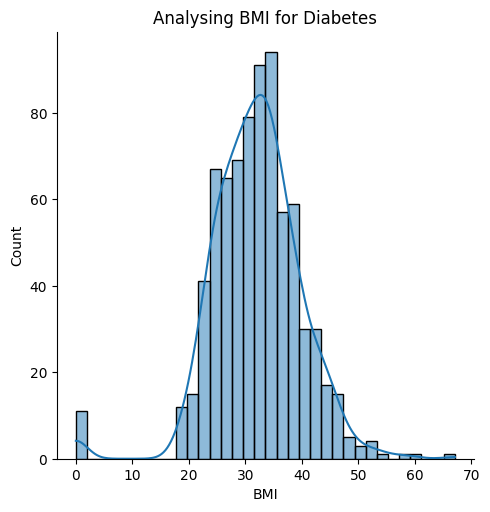

Shapiro-Wilk test: ShapiroResult(statistic=0.9499890208244324, pvalue=1.8407586602041262e-15)


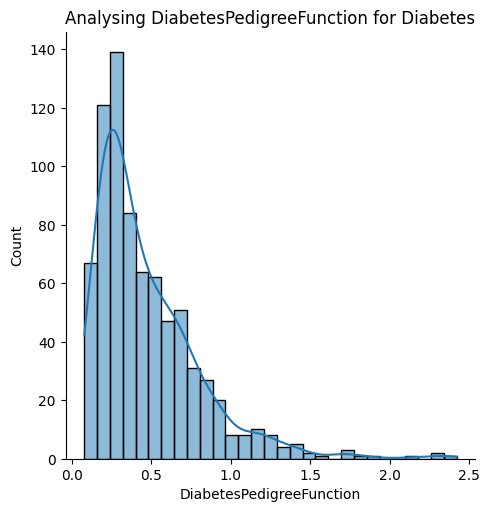

Shapiro-Wilk test: ShapiroResult(statistic=0.8365188837051392, pvalue=2.4777990069755762e-27)


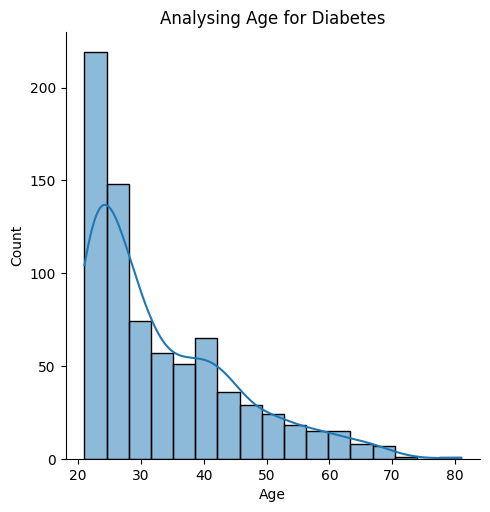

Shapiro-Wilk test: ShapiroResult(statistic=0.874765932559967, pvalue=2.401829612553989e-24)


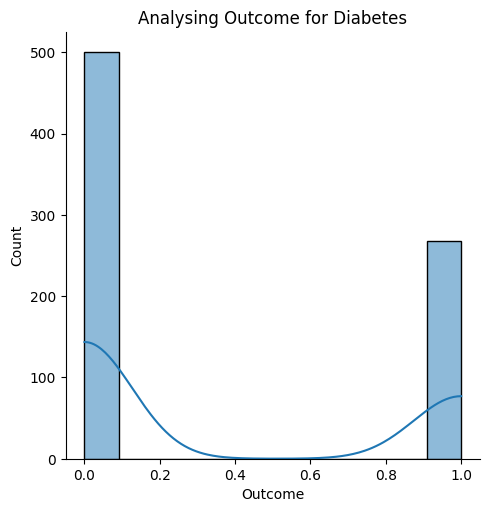

Shapiro-Wilk test: ShapiroResult(statistic=0.602509617805481, pvalue=1.2922618893873923e-38)


In [3]:
def displayDiabetes():
    for colName in diabetes_df:
        sns.displot(data=diabetes_df, x=colName, kde=True, linewidth=1)
        plt.title('Analysing '+colName+' for Diabetes')
        plt.show()
        print("Shapiro-Wilk test:", shapiro(diabetes_df[colName]))
        
displayDiabetes()






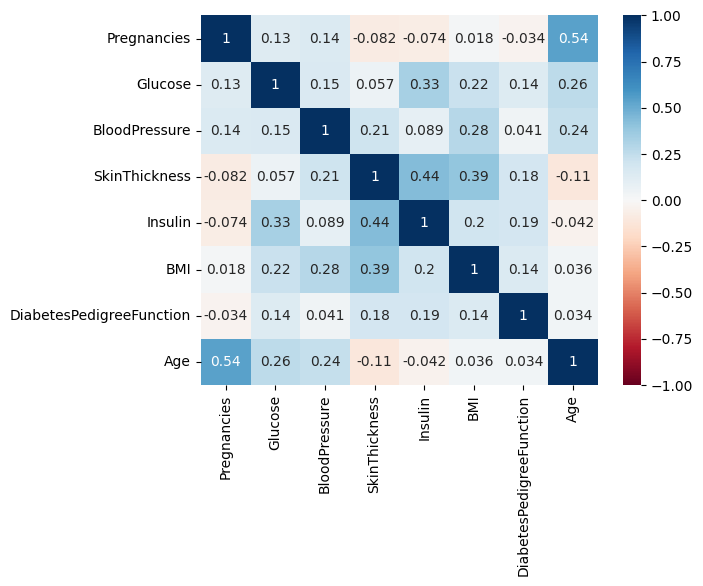

In [9]:
heatmap = diabetes_df.copy().drop(columns=['Outcome']).corr()
_ = sns.heatmap(heatmap, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

# Observations on our data
*  We have 768 patient observations
*  By running the shapiro wilk test we can observe that all of our data is most likely not normally distributed
*  We will pre process our data using the min max scaler as this method is the most efficient since all of our data is not normally distributed

## Dataset Attributes Information:
* Pregnancies: The number of pregnancies  (int64)
* Glucose: Glucose level in the blood (int64)
* BloodPressure: To express the Blood pressure measurement (int64)
* SkinThickness: To express the thickness of the skin (int64)
* Insulin: To express the Insulin level in the blood (int64)
* BMI: To express the Body mass index (float64)
* DiabetesPedigreeFunction: To express the Diabetes percentage (float64)
* Age: To express the age (int64)
* Outcome: A boolean variable to indicate whether the person is diabetic (1) or not diabetic (0) (boolean)
